In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [102]:
import os
os.chdir('D:\Manvi\olist')

In [103]:
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

For my research question I identified a few suitable datasets from the given datasets. Lets explore these individual datasets and clean them before merging.  

In [104]:
datasets_names = ['orders', 'customers', 'order_reviews', 'order_items', 'products', 'payments','product_category']
for dataset in datasets_names:
    print("Dataset {} has shape {}".format(dataset, eval(dataset).shape))

Dataset orders has shape (99441, 8)
Dataset customers has shape (99441, 5)
Dataset order_reviews has shape (99224, 7)
Dataset order_items has shape (112650, 7)
Dataset products has shape (32951, 9)
Dataset payments has shape (103886, 5)
Dataset product_category has shape (71, 2)


Cleaning the Orders Dataset

In [105]:
orders.describe().transpose()


,count,unique,top,freq
order_id,99441,99441,15ccd9465465614391948bdd2d3b4da0,1
customer_id,99441,99441,5ce38fa5daeaac0e2a58fcde5fbc923a,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:05:26,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2016-10-27 17:32:07,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [106]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [107]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [108]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [109]:
#orders['order_time'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.time
#orders['delivery_time'] = pd.to_datetime(orders['order_delivered_carrier_date']).dt.time

I have not Used datetime format values for regression analysis, will be dropping them for now. 
Code: import datetime as dt
def convert_to_dt(dat, cols):
    '''Function takes in a dataframe name and date columns for conversion into datetime format'''
    for col in cols:
        dat[col] = pd.to_datetime(dat[col], format='%Y-%m-%d').dt.date
        dat[col]=dat[col].map(dt.datetime.toordinal)
convert_to_dt(orders, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
orders.sort_values(by = 'order_purchase_timestamp', inplace = True)

In [110]:
orders.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],axis=1,inplace=True)

In [111]:
orders.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [112]:
#orders['order_delivered_customer_date'].iloc[:4].bfill(inplace=True)

Code: for col in [
    'order_delivered_customer_date',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',

]:
    orders[col].fillna(method = 'ffill', inplace = True)

print('Missing values: ', orders['order_delivered_customer_date'].isnull().sum())

Cleaning the Product dataset

In [113]:
products.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [114]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [115]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [116]:
products['product_id'].duplicated().sum()

0

In [117]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [118]:
# imputing null values 
products["product_weight_g"]=products["product_weight_g"].fillna(products["product_weight_g"].median())
products["product_length_cm"]=products["product_length_cm"].fillna(products["product_length_cm"].median())
products["product_height_cm"]=products["product_height_cm"].fillna(products["product_height_cm"].median())
products["product_width_cm"]=products["product_width_cm"].fillna(products["product_width_cm"].median())
products["product_photos_qty"]=products["product_photos_qty"].fillna(products["product_photos_qty"].mean())

In [119]:
# Dropping product category column
products.drop(['product_description_lenght','product_name_lenght'],axis=1,inplace=True)

In [120]:
products.isna().sum()

product_id                 0
product_category_name    610
product_photos_qty         0
product_weight_g           0
product_length_cm          0
product_height_cm          0
product_width_cm           0
dtype: int64

Cleaning order_items table

In [121]:
order_items.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [122]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [123]:
order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [124]:
order_items.head(3)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [125]:
# I was planning on dropping the order_item_id as well but realised it could be used for EDA.  
order_items.drop(['seller_id','shipping_limit_date','order_item_id'],axis=1,inplace=True)

Cleaning the  Payments dataset

In [126]:
payments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [127]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [128]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [129]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [130]:
# The duplicated values for order_id show that there were 4446 instances of orders where multiple payment sources were used.  
payments['order_id'].duplicated().sum()

4446

In [131]:
payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [132]:
payments.payment_sequential.nunique()

29

Cleaning the Customer dataset

In [133]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [134]:
customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


In [135]:
customers.customer_city.nunique()



4119

In [136]:
customers.customer_state.nunique()

27

The values for zip code and and customer city are redundant. The number of customer cities is high, categorisation will not work so I will be dropping customer zip code and customer city. customer_unique_id column is not useful either and it is not a foreign key, we will drop it too. 

In [137]:
customers.drop(['customer_zip_code_prefix','customer_city','customer_unique_id'],axis=1,inplace=True)

Cleaning the Product Category dataset

In [138]:
product_category.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [139]:
product_category.describe().transpose()

,count,unique,top,freq
product_category_name,71,71,fashion_calcados,1
product_category_name_english,71,71,sports_leisure,1


In [140]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [141]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [142]:
# The dataset does not need any preprocessing

Cleaning the order_reviews dataset

In [143]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [144]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [145]:
order_reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


In [146]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [147]:
# We do not need the columns with null values for later processing, we will be dropping them along with many other columns

In [148]:
order_reviews.drop(['review_id','review_comment_title','review_comment_message','review_comment_message','review_creation_date','review_answer_timestamp'],axis=1,inplace=True)

In [149]:
order_reviews.head(3)

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5


Now that all datasets are cleaned we can start merging them to one final dataset

In [150]:
mdf1=pd.merge(products,pd.merge(orders,order_items,on="order_id",how='inner'),on="product_id",how='inner')

mdf1.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,customer_id,order_status,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,37.90,8.29


In [151]:
mdf2=pd.merge(order_reviews,(pd.merge(payments,mdf1,on="order_id",how='inner')),on="order_id",how='inner')
mdf3=pd.merge(product_category,(pd.merge(customers,mdf2,on="customer_id",how='inner')),on="product_category_name",how='inner') 

In [152]:
mdf3.head(3)

,product_category_name,product_category_name_english,customer_id,customer_state,order_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status,price,freight_value
0,beleza_saude,health_beauty,1f1c7bf1c9b041b292af6c1c4470b753,RS,6c949e670b5d33dc8fb8ad25b6da4860,5,1,credit_card,10,102.47,31cddbc370031fbb839a21441df28015,2.0,433.0,19.0,14.0,15.0,delivered,84.00,18.47
1,beleza_saude,health_beauty,b64ed91eab98972150bdaf77ca921934,RJ,d5691ee416fbe1f2d1b061319de61570,5,1,debit_card,1,72.26,9ea1152d6d52dc57ab2ea49aa626adc1,1.0,1067.0,22.0,19.0,19.0,delivered,54.00,18.26
2,beleza_saude,health_beauty,a905baa530258422594f1b05615bd225,CE,4f0695330f3816ef294bf1f4b18f4f2e,1,1,credit_card,1,77.30,3fbc0ef745950c7932d5f2a446189725,1.0,350.0,19.0,12.0,13.0,delivered,61.99,15.31


In [153]:
#removing all columns with unique values and only keeping columns that follow temporal ordering (i.e existed at the time of prediction). 
mdf3.drop(['product_category_name','customer_id','order_id','product_id','order_status','payment_installments'],axis=1,inplace=True)

In [154]:
mdf3.head(3)

,product_category_name_english,customer_state,review_score,payment_sequential,payment_type,payment_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,freight_value
0,health_beauty,RS,5,1,credit_card,102.47,2.0,433.0,19.0,14.0,15.0,84.00,18.47
1,health_beauty,RJ,5,1,debit_card,72.26,1.0,1067.0,22.0,19.0,19.0,54.00,18.26
2,health_beauty,CE,1,1,credit_card,77.30,1.0,350.0,19.0,12.0,13.0,61.99,15.31


In [155]:
mdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name_english  115609 non-null  object 
 1   customer_state                 115609 non-null  object 
 2   review_score                   115609 non-null  int64  
 3   payment_sequential             115609 non-null  int64  
 4   payment_type                   115609 non-null  object 
 5   payment_value                  115609 non-null  float64
 6   product_photos_qty             115609 non-null  float64
 7   product_weight_g               115609 non-null  float64
 8   product_length_cm              115609 non-null  float64
 9   product_height_cm              115609 non-null  float64
 10  product_width_cm               115609 non-null  float64
 11  price                          115609 non-null  float64
 12  freight_value                 

In [156]:
mdf3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
review_score,115609.0,4.034409,1.385584,1.00,4.00,5.00,5.00,5.00
payment_sequential,115609.0,1.093747,0.729849,1.00,1.00,1.00,1.00,29.00
payment_value,115609.0,172.387379,265.873969,0.00,60.87,108.05,189.48,13664.08
product_photos_qty,115609.0,2.205373,1.717771,1.00,1.00,1.00,3.00,20.00
product_weight_g,115609.0,2113.895467,3781.740826,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,115609.0,30.307857,16.211046,7.00,18.00,25.00,38.00,105.00
product_height_cm,115609.0,16.638445,13.473516,2.00,8.00,13.00,20.00,105.00
product_width_cm,115609.0,23.113140,11.755036,6.00,15.00,20.00,30.00,118.00
price,115609.0,120.619850,182.653476,0.85,39.90,74.90,134.90,6735.00
freight_value,115609.0,20.056880,15.836184,0.00,13.08,16.32,21.21,409.68


In [157]:
mdf3.isna().sum()

product_category_name_english    0
customer_state                   0
review_score                     0
payment_sequential               0
payment_type                     0
payment_value                    0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
price                            0
freight_value                    0
dtype: int64

In [158]:
mdf3.product_category_name_english.nunique()

71

In [159]:
mdf3.payment_type.nunique()

4

In [160]:
mdf3.customer_state.nunique()

27

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
mdf3_num=mdf3.select_dtypes(include=[np.number])
mdf3_cat=mdf3.select_dtypes(include=[np.object])

In [162]:
# Dealing with categorical data. 
#1. For the 'payment_type' we use one hot encoding

mdf3_cat = pd.concat([mdf3_cat,pd.get_dummies(mdf3_cat['payment_type'],prefix='payment_type')],axis=1)
mdf3_cat.drop(['payment_type'],axis=1, inplace=True)


In [163]:
mdf5=mdf3_cat[['customer_state','product_category_name_english']]

In [164]:
mdf5.to_csv('mdf5.csv')

In [165]:
mdf3_cat.head(3)

,product_category_name_english,customer_state,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,health_beauty,RS,0,1,0,0
1,health_beauty,RJ,0,0,1,0
2,health_beauty,CE,0,1,0,0


In [166]:
# Dealing with categorical data. 
#2. For the 'customer_state' we use one hot encoding
mdf3_cat = pd.concat([mdf3_cat,pd.get_dummies(mdf3_cat['customer_state'],prefix='customer_state')],axis=1)
mdf3_cat.drop(['customer_state'],axis=1, inplace=True)

In [167]:
mdf3_cat.head(3)

,product_category_name_english,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,health_beauty,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,health_beauty,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,health_beauty,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# Dealing with categorical data. 
#3. For the 'product_category_name_english' (high cardinality) we use frequency encoding 
# grouping by frequency
fq = mdf3_cat.groupby('product_category_name_english').size()/len(mdf3_cat)   
# mapping values to dataframe
mdf3_cat.loc[:, "{}_freq_encode".format('product_category_name_english')] = mdf3_cat['product_category_name_english'].map(fq)  
# drop original column.
mdf3_cat = mdf3_cat.drop(['product_category_name_english'], axis = 1) 

In [169]:
mdf3_cat.head(3)

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,...,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_english_freq_encode
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.086014
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.086014
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.086014


In [170]:
#print(mdf3_cat["payment_type"].value_counts())
#mdf3_cat["payment_type"].value_counts().plot(kind="pie",autopct="%1.2f%%")

In [171]:
#print(mdf3_cat["order_status"].value_counts())
#explodetup=(0,2,2,2,2,2,2)
#plt.pie(x=mdf3_cat["order_status"].value_counts(), autopct="%.1f%%",explode=explodetup,pctdistance=1.1,startangle=45,radius=2)
#plt.show()

In [172]:
#print(mdf3_cat["product_category_name_english"].value_counts().sort_values(ascending=False).head(10))
#mdf3_cat["product_category_name_english"].value_counts().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%1.2f%%")
#top10categories

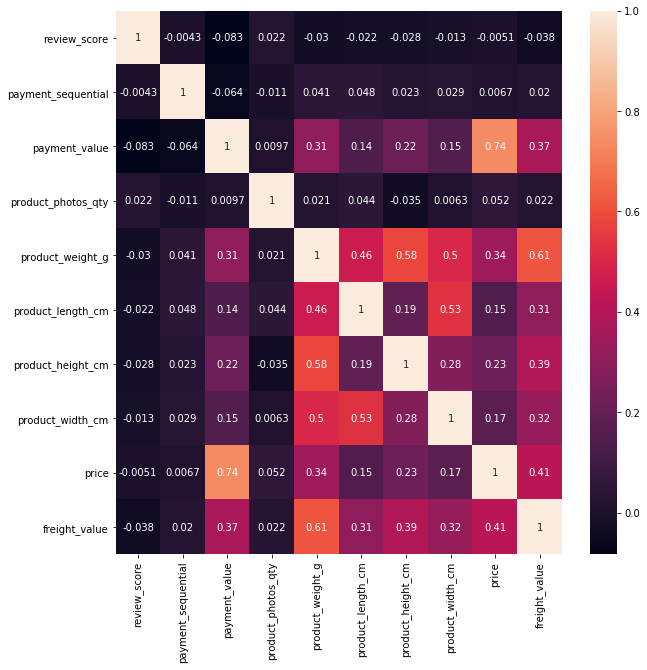

In [173]:
# checking assumption for multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(mdf3_num.corr(),annot=True)
plt.show()

In [174]:
# product weight has high correlation with frieght_value and and product_height. Dropping the column
mdf3_num.drop('product_weight_g',axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


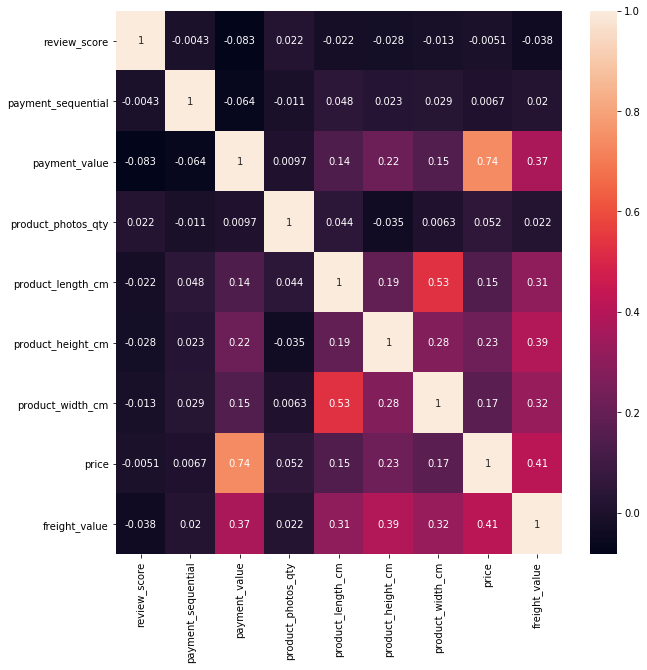

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(mdf3_num.corr(),annot=True)
plt.show()

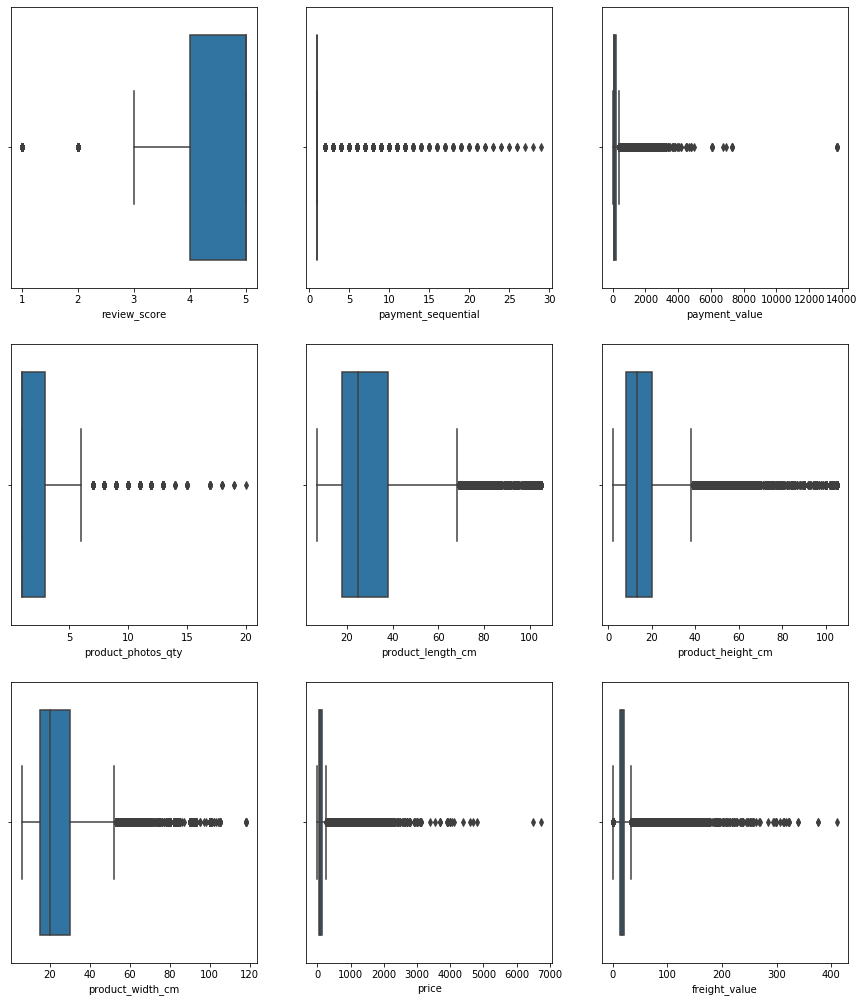

In [176]:
#Preparing the non categorical predictors: 
j=0
plt.figure(figsize=(15,30))
for i in mdf3_num:
    j=j+1
    plt.subplot(5,3,j)
    sns.boxplot(mdf3_num[i])
plt.show()

# Boxplot shows the presence of few outliers 

In [177]:
# removing outliers by iqr 

q1=mdf3_num.quantile(0.25)
q3=mdf3_num.quantile(0.75)
iqr=q3-q1

mdf3_num=mdf3_num[~((mdf3_num<(q1-1.5*iqr))|(mdf3_num>(q3+1.5*iqr))).any(axis=1)]

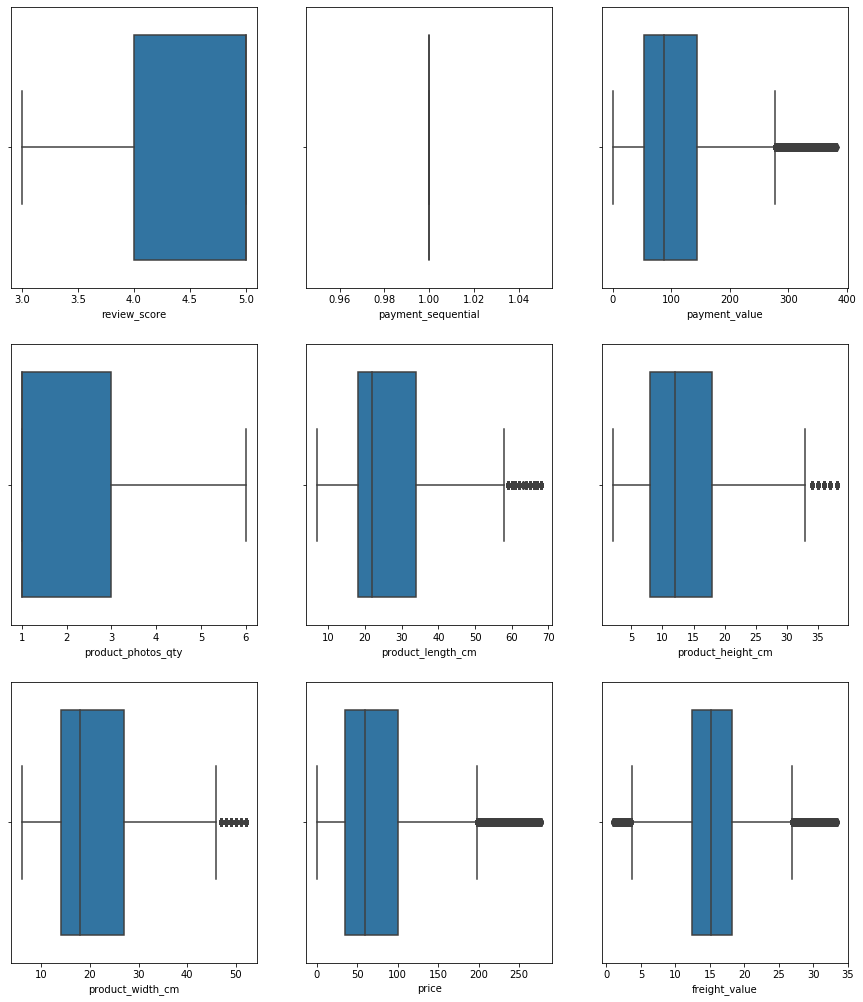

In [178]:
j=0
plt.figure(figsize=(15,30))
for i in mdf3_num:
    j=j+1
    plt.subplot(5,3,j)
    sns.boxplot(mdf3_num[i])
plt.show()

In [179]:
mdf3.skew()

review_score          -1.275225
payment_sequential    16.001768
payment_value         14.306544
product_photos_qty     1.910868
product_weight_g       3.580668
product_length_cm      1.742523
product_height_cm      2.243135
product_width_cm       1.707230
price                  7.615418
freight_value          5.560213
dtype: float64

In [180]:
mdf3_num.drop('payment_sequential',axis=1,inplace=True)

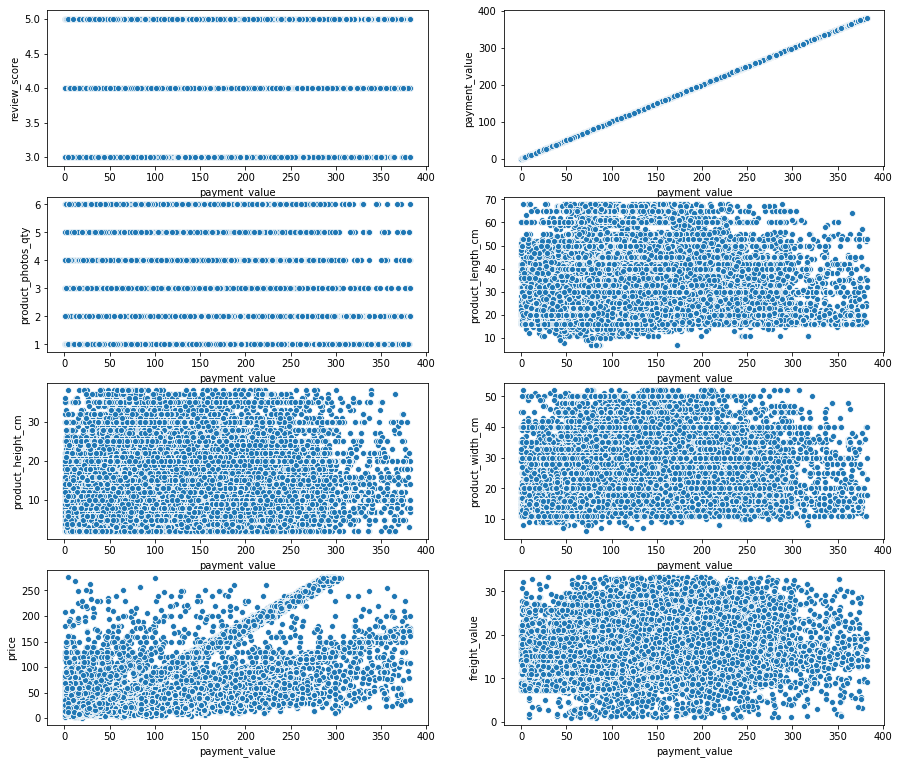

In [181]:
j=0
plt.figure(figsize=(15,20))
for i in mdf3_num:
    j=j+1
    plt.subplot(6,2,j)
    sns.scatterplot(mdf3_num['payment_value'],mdf3_num[i])
plt.show()

# Not much data has a linear Relationship with Price therefore Regression analysis 
# should include multiple algorithms to gain some complex relationship

In [182]:
mdf3_num.shape


(69542, 8)

In [183]:
from scipy import stats
for i in mdf3_num.drop('payment_value',axis=1).select_dtypes(include=np.number).columns:
    s=stats.pearsonr(mdf3_num[i],mdf3_num['payment_value'])
    if(s[1]<0.05):
        print(i,' affects payment_value')
    else:
        print(i,' does not payment_price')

review_score  does not payment_price
product_photos_qty  affects payment_value
product_length_cm  affects payment_value
product_height_cm  affects payment_value
product_width_cm  affects payment_value
price  affects payment_value
freight_value  affects payment_value


In [184]:
target=mdf3_num["payment_value"]
mdf3_num=mdf3_num.drop("payment_value",axis=1)
mdf4=pd.concat([mdf3_num,mdf3_cat],join='inner',axis=1)

In [185]:
mdf4.head(5)

,review_score,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,...,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_english_freq_encode
0,5,2.0,19.0,14.0,15.0,84.00,18.47,0,1,0,...,0,0,0,0,1,0,0,0,0,0.086014
1,5,1.0,22.0,19.0,19.0,54.00,18.26,0,0,1,...,1,0,0,0,0,0,0,0,0,0.086014
3,5,1.0,19.0,11.0,18.0,47.65,7.71,0,1,0,...,0,0,0,0,0,0,0,1,0,0.086014
6,5,1.0,20.0,12.0,12.0,189.00,24.47,0,0,1,...,0,0,0,0,0,0,0,0,0,0.086014
7,5,1.0,19.0,11.0,18.0,53.99,7.39,0,1,0,...,0,0,0,0,0,0,0,1,0,0.086014


In [186]:
print(target.shape)
mdf4.shape

(69542,)


(69542, 39)

In [187]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(mdf4,target,test_size=0.3,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48679, 39)
(20863, 39)
(48679,)
(20863,)


In [188]:
# X_train needs furthe cleaning, we did not prepare data before to prevent data leakage
X_train.head(5)

,review_score,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,...,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_english_freq_encode
2590,4,1.0,20.0,15.0,15.0,34.99,11.85,0,1,0,...,0,0,0,0,0,0,0,1,0,0.086014
1227,5,1.0,20.0,15.0,15.0,23.99,11.85,0,1,0,...,0,0,0,0,0,0,0,1,0,0.086014
11824,5,2.0,18.0,12.0,14.0,36.90,15.10,0,1,0,...,0,0,0,0,0,1,0,0,0,0.070107
67576,4,3.0,16.0,2.0,11.0,29.00,14.10,0,1,0,...,0,0,0,0,0,0,0,0,0,0.053292
76790,5,2.0,20.0,13.0,13.0,48.90,19.32,0,1,0,...,0,0,0,0,0,0,0,0,0,0.027489


In [189]:
#X_train_num=X_train[['review_score','payment_sequential','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','price','freight_value']]
#X_train.drop(['review_score','payment_sequential','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','price','freight_value'],axis=1,inplace=True)

In [190]:
#Train=pd.concat([X_train_num,Y_train],axis=1)

In [191]:
#Train.head()

In [192]:
#Y_train=Train['payment_value']
#X_train=pd.concat([Train,X_train],axis=1)
#X_train.drop(['payment_value'],axis=1,inplace=True)

In [193]:
Y_train.dtype # verified 

dtype('float64')

## Implementing Multiple Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression as lr
reg = lr().fit(X_train, Y_train)

In [195]:
pred=reg.predict(X_test)

In [196]:
print(reg.score(X_test, Y_test))

0.5739587891006661


In [197]:
reg2 = lr().fit(X_train, Y_train)

print("Train Accuracy:",reg.score(X_train, Y_train))
print("Test Accuracy:",reg.score(X_test, Y_test))

Train Accuracy: 0.5767055795973166
Test Accuracy: 0.5739587891006661


In [198]:
import sklearn
from sklearn.metrics import mean_squared_error

sklearn.metrics.mean_squared_error(Y_test, pred, sample_weight=None, multioutput='uniform_average', squared=True)

1986.6556298040189